## 第6章：機械学習
本章では，Fabio Gasparetti氏が公開している[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)を用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

### 50. データの入手・整形
[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2022-03-20 05:55:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  34.3MB/s    in 0.8s    

2022-03-20 05:55:15 (34.3 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# 1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
with open("readme.txt", "r") as f:
    print(f.read())

SUMMARY: Dataset of references (urls) to news web pages

DESCRIPTION: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.

TAGS: web pages, news, aggregator, classification, clustering

LICENSE: Public domain - Due to restrictions on content and use of the news sources, the corpus is limited to web references (urls) to web pages and does not include any text content. The references have been retrieved from the news aggregator through traditional web browsers. 

FILE ENCODING: UTF-8

FORMAT: Tab delimited CSV files. 

DATA SHAPE AND STATS: 422937 news pages and divided up into:

152746 	news of business category
108465 	news of science and technology category
115920 	news of business category
 45615 	news of

In [3]:
import pandas as pd

df = pd.read_csv("newsCorpora.csv", sep="\t", header=None, names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
# 2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
df = df.loc[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]), :]
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [5]:
# 3. 抽出された事例をランダムに並び替える．
df = df.sample(frac=1, random_state=0)
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
310638,311098,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,http://in.reuters.com/article/2014/06/24/fitch...,Reuters,b,d3tIMfB2mg-9MZM4G_jGTEiRVl3jM,in.reuters.com,1403633888597
49197,49198,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",http://www.businessweek.com/news/2014-03-26/gu...,Businessweek,e,dWeC4g3bvX-bI6MKAcxt43Jp7MzSM,www.businessweek.com,1395886231417
410059,410578,"UPDATE 1-Fairfax Financial, CEO probed over po...",http://in.reuters.com/article/2014/08/01/fairf...,Reuters,b,d6s61cXf9rASExMO8inpkRujc9VTM,in.reuters.com,1406929609070
270222,270668,Angelina Jolie - Angelina Jolie Will Not Tight...,http://www.contactmusic.com/story/angelina-jol...,Contactmusic.com,e,d7SbUKanRaD34YMwE64lo09d_qCnM,www.contactmusic.com,1401828902205
301196,301656,Patent Officials Cancel the Washington Redskin...,http://www.businessweek.com/articles/2014-06-1...,Businessweek,b,dXVU3KhKpHSxleMNmc46pQj6e5zwM,www.businessweek.com,1403113194649


In [6]:
# 4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，
# それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
# ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
from sklearn.model_selection import train_test_split

# shuffle=Trueとすればランダムに並び替えられる
# stratifyでは指定したカラムの構成比が等しくなるように分割される
train, valid_test = train_test_split(df.loc[:,["TITLE", "CATEGORY"]], test_size=0.2, stratify=df["CATEGORY"])
valid, test = train_test_split(valid_test, test_size=0.5, stratify=valid_test["CATEGORY"])

train.to_csv("./train.txt", sep="\t", index=False)
valid.to_csv("./valid.txt", sep="\t", index=False)
test.to_csv("./test.txt", sep="\t", index=False)

print("--- 学習データ ---")
print(train["CATEGORY"].value_counts())
print("--- 検証データ ---")
print(valid["CATEGORY"].value_counts())
print("--- 評価データ ---")
print(test["CATEGORY"].value_counts())

--- 学習データ ---
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
--- 検証データ ---
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64
--- 評価データ ---
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64


In [7]:
with open("valid.txt", "r") as f:
    print(f.read())

TITLE	CATEGORY
Samuel L. Jackson Appalled At Harrison Ford Breaking Ankle On 'Stars Episode  ...	e
Asia Stocks Rise, Led by Utilities, as Hong Kong Rebounds	b
FCC collecting peering agreements from Netflix and Verizon, Comcast	t
"False Alarm: Chris Colfer Is Not Abandoning The ""Glee"" Ship"	e
Kim Kardashian - Kim Kardashian And Kanye West Wedding Snaps Released	e
'Viva San Fermin!': Thousands of revellers kick off iconic Spanish bull running  ...	e
Coldwater Creek Wins Approval of Loan to Fund Liquidation (1)	b
Brent Erases Iraq Rally With Price Below When Mosul Taken	b
Lana Del Rey Responds To Frances Bean Cobain Criticism, Blames Newspaper  ...	e
Facebook Pride Stickers Debut In Honor Of LGBT Pride Month	t
Tv - Kristin Cavallari Welcomes Second Son	e
Fed should not let economy overheat, Fisher tells CNBC	b
Lupita Nyong'o's Met Gala 2014 Dress Takes The Theme Very Literally	e
Fitch Affirms Italian City of Busto Arsizio at 'BBB+'; Outlook Negative	b
Keri Russell - Keri Russell: Andy S

### 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [8]:
import string
import re

def preprocessing(text):
    # string.punctuation = "!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    # "ab"*3 = "ababab"
    table = str.maketrans(string.punctuation, " "*len(string.punctuation))
    text = text.translate(table)
    text = text.lower()
    text = re.sub(r"\d+", "0", text)

    return text

df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

df["TITLE"] = df["TITLE"].map(lambda x: preprocessing(x))
df.head()

,TITLE,CATEGORY
0,us federal reserve july beige book summary text,b
1,ford said to decide on fields as ceo as mulall...,b
2,jupiter s red spot shrinks to smallest size ev...,t
3,fitch lowers south africa credit rating outloo...,b
4,hedge funds cut bullish oil as iraq sent price...,b


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_valid = df[:len(train)+len(valid)]
test = df[len(train)+len(valid):]

vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))

# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid["TITLE"])
X_test = vec_tfidf.transform(test["TITLE"])

# データフレームに変換
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names())

# データの分割
X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

# ファイルの保存
X_train.to_csv("./train.feature.txt", sep="\t", index=False)
X_valid.to_csv("./valid.feature.txt", sep="\t", index=False)
X_test.to_csv("./test.feature.txt", sep="\t", index=False)

X_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0d,0m,0million,0nd,0s,0st,0th,0th birthday,aa,aaliyah,...,young,your,your mother,yr,yr high,yuan,zac,zac efron,zendaya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, train["CATEGORY"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

### 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [11]:
import numpy as np

train_pred = lr_model.predict(X_train)
train_pred_proba = np.max(lr_model.predict_proba(X_train), axis=1)

for i in range(10):
    print("予測カテゴリ：{}, 予測確率：{:.2f}".format(train_pred[i], train_pred_proba[i]))

予測カテゴリ：b, 予測確率：0.68
予測カテゴリ：b, 予測確率：0.86
予測カテゴリ：t, 予測確率：0.59
予測カテゴリ：b, 予測確率：0.95
予測カテゴリ：b, 予測確率：0.97
予測カテゴリ：e, 予測確率：0.82
予測カテゴリ：b, 予測確率：0.81
予測カテゴリ：b, 予測確率：0.98
予測カテゴリ：b, 予測確率：0.97
予測カテゴリ：e, 予測確率：0.94


### 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [12]:
from sklearn.metrics import accuracy_score

test_pred = lr_model.predict(X_test)

print("正解率（学習データ）：{:.2f}".format(accuracy_score(train["CATEGORY"], train_pred)))
print("正解率（評価データ）：{:.2f}".format(accuracy_score(test["CATEGORY"], test_pred)))

正解率（学習データ）：0.92
正解率（評価データ）：0.88


### 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

[[4335  101   11   55]
 [  64 4148    2    9]
 [  91  129  499    9]
 [ 192  149   10  868]]


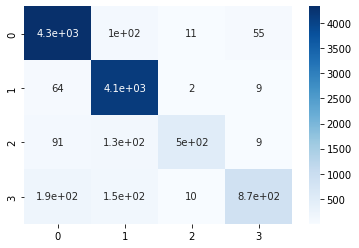

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(train["CATEGORY"], train_pred)
print(train_cm)
# annot でセルに値を出力するか指定
sns.heatmap(train_cm, annot=True, cmap="Blues")
plt.show()

[[526  20   0  16]
 [ 14 512   0   2]
 [ 13  23  49   6]
 [ 39  24   0  90]]


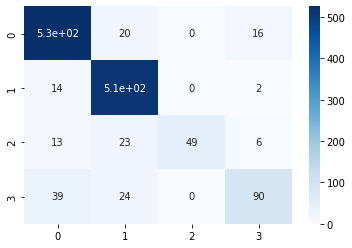

In [14]:
test_cm = confusion_matrix(test["CATEGORY"], test_pred)
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap="Blues")
plt.show()

### 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# average=None でクラス別に精度を返す
precision = precision_score(test["CATEGORY"], test_pred, average=None, labels=["b", "e", "t", "m"])
precision = np.append(precision, precision_score(test["CATEGORY"], test_pred, average="micro"))
precision = np.append(precision, precision_score(test["CATEGORY"], test_pred, average="macro"))

recall = recall_score(test["CATEGORY"], test_pred, average=None, labels=["b", "e", "t", "m"])
recall = np.append(recall, recall_score(test["CATEGORY"], test_pred, average="micro"))
recall = np.append(recall, recall_score(test["CATEGORY"], test_pred, average="macro"))

f1 = f1_score(test["CATEGORY"], test_pred, average=None, labels=["b", "e", "t", "m"])
f1 = np.append(f1, f1_score(test["CATEGORY"], test_pred, average="micro"))
f1 = np.append(f1, f1_score(test["CATEGORY"], test_pred, average="macro"))

scores = pd.DataFrame({"適合率":precision, "再現率":recall, "F1スコア":f1}, index=["b", "e", "t", "m", "マイクロ平均", "マクロ平均"])
scores.head(6)

,適合率,再現率,F1スコア
b,0.888514,0.935943,0.911612
e,0.884283,0.969697,0.925023
t,0.789474,0.588235,0.674157
m,1.000000,0.538462,0.700000
マイクロ平均,0.882309,0.882309,0.882309
マクロ平均,0.890568,0.758084,0.802698


### 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [16]:
features = X_train.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(lr_model.classes_, lr_model.coef_):
    print("【カテゴリ】".format(c))
    best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=["重要度上位"], index=index).T
    worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=["重要度下位"], index=index).T
    display(pd.concat([best10, worst10], axis=0))
    print("\n")

【カテゴリ】


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,fed,stocks,ecb,china,euro,obamacare,yellen,oil,ukraine
重要度下位,ebola,her,and,study,video,apple,aereo,google,star,fda




【カテゴリ】


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,movie,film,her,she,paul,jay,kim,wedding
重要度下位,update,us,google,china,gm,study,ceo,says,could,facebook




【カテゴリ】


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,fda,cancer,mers,drug,cases,health,could,doctors
重要度下位,facebook,gm,deal,apple,ceo,bank,climate,twitter,amazon,sales




【カテゴリ】


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,apple,facebook,microsoft,climate,gm,tesla,nasa,mobile,comcast
重要度下位,stocks,fed,her,cancer,drug,day,shares,ukraine,ecb,percent


### 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [17]:
result = []
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    lr_model = LogisticRegression(C = C, random_state=0)
    lr_model.fit(X_train, train["CATEGORY"])

    train_pred = lr_model.predict(X_train)
    valid_pred = lr_model.predict(X_valid)
    test_pred = lr_model.predict(X_test)

    train_accuracy = accuracy_score(train["CATEGORY"], train_pred)
    valid_accuracy = accuracy_score(valid["CATEGORY"], valid_pred)
    test_accuracy = accuracy_score(test["CATEGORY"], test_pred)

    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


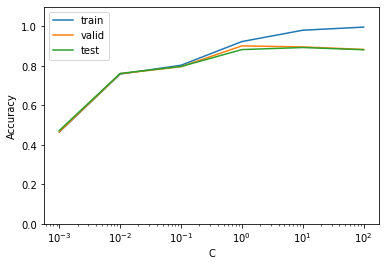

In [18]:
result = np.array(result).T
plt.plot(result[0], result[1], label="train")
plt.plot(result[0], result[2], label="valid")
plt.plot(result[0], result[3], label="test")
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xscale("log")
plt.xlabel("C")
plt.legend()
plt.show()

### 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [19]:
from sklearn.svm import SVC

lr_model = LogisticRegression(C=10)
lr_model.fit(X_train, train["CATEGORY"])

svm_model = SVC()
svm_model.fit(X_train, train["CATEGORY"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC()

In [20]:
valid_pred = lr_model.predict(X_valid)
print("accuracy(LogiticRegression):{:.5f}".format(accuracy_score(valid["CATEGORY"], valid_pred)))

accuracy(LogiticRegression):0.89580


In [21]:
# 時間がかかるので省略

# from sklearn.model_selection import GridSearchCV

# param_grid = {"C":[0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring="accuracy")
# grid_search.fit(X_train, train["CATEGORY"])
# print("Train set score:{:.5f}".format(grid_search.score(X_train, train["CATEGORY"])))
# print("Val set score  :{:.5f}".format(grid_search.score(X_val, valid["CATEGORY"])))
# print("Best parameters:{}".format(grid_search.best_params_))
# print("Best cross-validation score:{:.5f}".format(grid_search.best_score_))

In [22]:
best_valid = 0
best_param = 0
for C in [0.1, 1, 10]:
    svm_model = SVC(C=C)
    svm_model.fit(X_train, train["CATEGORY"])
    valid_pred = svm_model.predict(X_valid)
    if best_valid < accuracy_score(valid["CATEGORY"], valid_pred):
        best_valid = accuracy_score(valid["CATEGORY"], valid_pred)
        best_param = C
print("best_param:{}, best_valid_score:{:.5f}".format(C, best_valid))

best_param:10, best_valid_score:0.91304


In [23]:
# 検証データ上の正解率：lr_model < svm_model

svm_model = SVC(C=best_param)
svm_model.fit(X_train, train["CATEGORY"])
test_pred = svm_model.predict(X_test)
print("accuracy(test):{:.5f}".format(accuracy_score(test["CATEGORY"], test_pred)))

accuracy(test):0.89805


In [26]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 210 kB 45.1 MB/s 
     |████████████████████████████████| 81 kB 7.0 MB/s 
     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 150 kB 49.9 MB/s 
     |████████████████████████████████| 113 kB 35.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=510f3050099a81b724156c02d8db52ccf88203dd6c809d38757351a3cfec124c
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [28]:
# Optuna で試したもの
import optuna

def objective(trial):
    C = trial.suggest_uniform("C", 0.1, 10)

    svm_model = SVC(C=C)
    svm_model.fit(X_train, train["CATEGORY"])

    valid_pred = svm_model.predict(X_valid)

    valid_acc = accuracy_score(valid["CATEGORY"], valid_pred)

    return valid_acc

# 最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective, timeout=3600)

# 結果を表示
trial = study.best_trial
print("accuracy(valid) : {:.5f}".format(trial.value))
print("best_parameters : ", trial.params)

[I 2022-03-20 06:43:21,321] A new study created in memory with name: no-name-4bee8111-b819-48d2-86e6-0acdfd6239cc
[I 2022-03-20 06:49:37,753] Trial 0 finished with value: 0.9130434782608695 and parameters: {'C': 5.162291785930766}. Best is trial 0 with value: 0.9130434782608695.
[I 2022-03-20 06:55:35,696] Trial 1 finished with value: 0.9160419790104948 and parameters: {'C': 2.567323446918029}. Best is trial 1 with value: 0.9160419790104948.
[I 2022-03-20 07:01:49,992] Trial 2 finished with value: 0.9130434782608695 and parameters: {'C': 8.754623694346327}. Best is trial 1 with value: 0.9160419790104948.
[I 2022-03-20 07:08:06,357] Trial 3 finished with value: 0.9130434782608695 and parameters: {'C': 4.8553048140132855}. Best is trial 1 with value: 0.9160419790104948.
[I 2022-03-20 07:13:33,536] Trial 4 finished with value: 0.8133433283358321 and parameters: {'C': 0.20413196365894087}. Best is trial 1 with value: 0.9160419790104948.
[I 2022-03-20 07:19:48,574] Trial 5 finished with val

accuracy(valid) : 0.91604
best_parameters :  {'C': 2.567323446918029}


In [32]:
svm_model = SVC(C=trial.params["C"])
svm_model.fit(X_train, train["CATEGORY"])
test_pred = svm_model.predict(X_test)
print("accuracy(test):{:.5f}".format(accuracy_score(test["CATEGORY"], test_pred)))

accuracy(test):0.89955
